#Task1

In [1]:
#importing all the required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import os
import re
import matplotlib as plt

In [2]:
!pip install ts2vg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.7 MB/s 


In [3]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 5.1 MB/s 


In [4]:
!pip install pycairo
!pip install cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 4.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.0 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.4.0-py3-none-any.whl size=88775 sha256=bf7dac713eaa6d12daab5155ce56ab1d094e109be0f96e059f4fdb8a786da367
  Stored in directory: /root/.cache/pip/wheels/01/a9/c0/5c05f9dd73c21f9a7716690642823cdba55594d17a9bd69daf
Successfully built cairocffi


In [5]:
from ts2vg import NaturalVG
from ts2vg import HorizontalVG

In [6]:
#resultant table 
Result=pd.DataFrame({'Method':[],
                     'Subject':[],
                    'Accelerometer Axis':[],
                    'Average Degree':[],
                    'Network Diameter':[],
                    'Average Path Length':[],
                    'Activity':[],
                    'Body Part':[]
                   })

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Each csv file from the folder is read and the resultant table is computed for HVG and NVG Model for all axis in accelerometer.
file_path = '/content/drive/MyDrive/Project2/'
for file in os.listdir(file_path):
  if 'head' in file:
      df=pd.read_csv(file_path+file)
      #subject=file[0]
      marker = 'acc'
      rP = '(.+?)' + marker
      subject= re.search(rP, file).group(1)
      marker1 = '_'
      marker2 = '_'
      regexPattern = marker1 + '(.+?)' + marker2
      activity= re.search(regexPattern, file).group(1)
      g = HorizontalVG()
      g.build(df['attr_x'][1000:2024])
      ig_g = g.as_igraph()
      Result.loc[len(Result.index)]=['HVG',subject,'x',np.mean(ig_g.degree()),ig_g.diameter(),ig_g.average_path_length(),activity,'head']
      g.build(df['attr_y'][1000:2024])
      ig_g = g.as_igraph()
      Result.loc[len(Result.index)]=['HVG',subject,'y',np.mean(ig_g.degree()),ig_g.diameter(),ig_g.average_path_length(),activity,'head']
      g.build(df['attr_z'][1000:2024])
      ig_g = g.as_igraph()
      Result.loc[len(Result.index)]=['HVG',subject,'z',np.mean(ig_g.degree()),ig_g.diameter(),ig_g.average_path_length(),activity,'head']
      g = NaturalVG()
      g.build(df['attr_x'][1000:2024])
      ig_g = g.as_igraph()
      Result.loc[len(Result.index)]=['NVG',subject,'x',np.mean(ig_g.degree()),ig_g.diameter(),ig_g.average_path_length(),activity,'head'] 
      g.build(df['attr_y'][1000:2024])
      ig_g = g.as_igraph()
      Result.loc[len(Result.index)]=['NVG',subject,'y',np.mean(ig_g.degree()),ig_g.diameter(),ig_g.average_path_length(),activity,'head']
      g.build(df['attr_z'][1000:2024])
      ig_g = g.as_igraph()
      Result.loc[len(Result.index)]=['NVG',subject,'z',np.mean(ig_g.degree()),ig_g.diameter(),ig_g.average_path_length(),activity,'head']
  if 'chest' in file:
      df=pd.read_csv(file_path+file)
      subject=file[0]
      marker1 = '_'
      marker2 = '_'
      regexPattern = marker1 + '(.+?)' + marker2
      activity= re.search(regexPattern, file).group(1)
      g = HorizontalVG()
      g.build(df['attr_x'][1000:2024])
      ig_g = g.as_igraph()
      Result.loc[len(Result.index)]=['HVG',subject,'x',np.mean(ig_g.degree()),ig_g.diameter(),ig_g.average_path_length(),activity,'chest']
      g.build(df['attr_y'][1000:2024])
      ig_g = g.as_igraph()
      Result.loc[len(Result.index)]=['HVG',subject,'y',np.mean(ig_g.degree()),ig_g.diameter(),ig_g.average_path_length(),activity,'chest']
      g.build(df['attr_z'][1000:2024])
      ig_g = g.as_igraph()
      Result.loc[len(Result.index)]=['HVG',subject,'z',np.mean(ig_g.degree()),ig_g.diameter(),ig_g.average_path_length(),activity,'chest']
      g = NaturalVG()
      g.build(df['attr_x'][1000:2024])
      ig_g = g.as_igraph()
      Result.loc[len(Result.index)]=['NVG',subject,'x',np.mean(ig_g.degree()),ig_g.diameter(),ig_g.average_path_length(),activity,'chest'] 
      g.build(df['attr_y'][1000:2024])
      ig_g = g.as_igraph()
      Result.loc[len(Result.index)]=['NVG',subject,'y',np.mean(ig_g.degree()),ig_g.diameter(),ig_g.average_path_length(),activity,'chest']
      g.build(df['attr_z'][1000:2024])
      ig_g = g.as_igraph()
      Result.loc[len(Result.index)]=['NVG',subject,'z',np.mean(ig_g.degree()),ig_g.diameter(),ig_g.average_path_length(),activity,'chest']

In [13]:
Result

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Body Part
0,HVG,1,x,3.939453,28.0,11.345016,walking,chest
1,HVG,1,y,3.957031,31.0,12.852015,walking,chest
2,HVG,1,z,3.955078,21.0,8.608667,walking,chest
3,NVG,1,x,9.533203,11.0,4.457285,walking,chest
4,NVG,1,y,12.513672,11.0,4.917133,walking,chest
...,...,...,...,...,...,...,...,...
715,HVG,3,y,3.933594,34.0,15.001619,climbingdown,chest
716,HVG,3,z,3.939453,38.0,11.915701,climbingdown,chest
717,NVG,3,x,11.111328,9.0,4.097857,climbingdown,chest
718,NVG,3,y,16.359375,16.0,6.820122,climbingdown,chest


In [ ]:
ResultHead=Result[Result['Body Part']=='head']
ResultChest=Result[Result['Body Part']=='chest']

## Based on Head Body part

In [ ]:
ClimbingUp=ResultHead[ResultHead['Activity']=='climbingup']
ClimbingDown=ResultHead[ResultHead['Activity']=='climbingdown']
Running=ResultHead[ResultHead['Activity']=='running']
Walking=ResultHead[ResultHead['Activity']=='walking']

### Scatter plot Climbing Up and Climbing Down


### Horizontal Visibility Graph

In [ ]:
Climbing=ClimbingUp.append(ClimbingDown)
Climbing

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Body Part
18,HVG,1,x,3.951172,33.0,13.551780,climbingup,head
19,HVG,1,y,3.921875,48.0,21.289009,climbingup,head
20,HVG,1,z,3.921875,39.0,16.455628,climbingup,head
21,NVG,1,x,9.167969,12.0,5.033866,climbingup,head
22,NVG,1,y,18.816406,9.0,4.386371,climbingup,head
...,...,...,...,...,...,...,...,...
343,HVG,1,y,3.949219,25.0,10.861815,climbingdown,head
344,HVG,1,z,3.931641,48.0,18.122953,climbingdown,head
345,NVG,1,x,10.019531,13.0,5.308571,climbingdown,head
346,NVG,1,y,13.814453,10.0,4.723846,climbingdown,head


In [ ]:
Climbing=Climbing[Climbing['Method']=='HVG']

[Text(0.5, 1.0, 'Based on all axis')]

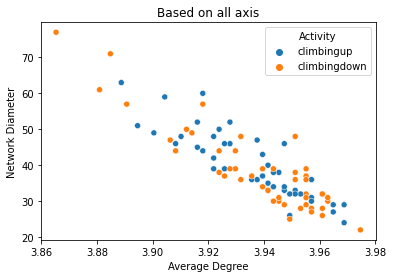

In [ ]:
sns.scatterplot(x=Climbing['Average Degree'], y=Climbing['Network Diameter'], hue=Climbing['Activity']).set(title='Based on all axis')

[Text(0.5, 1.0, 'Based on X-axis')]

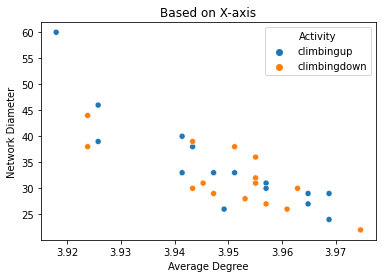

In [ ]:
ClimbingX=Climbing[Climbing['Accelerometer Axis']=='x']
sns.scatterplot(x=ClimbingX['Average Degree'], y=ClimbingX['Network Diameter'], hue=ClimbingX['Activity']).set(title="Based on X-axis")

[Text(0.5, 1.0, 'Based on Y-axis')]

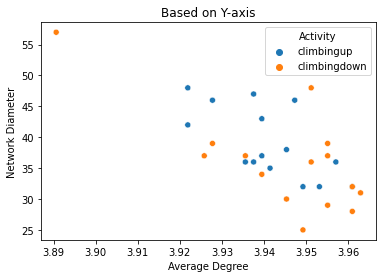

In [ ]:
ClimbingY=Climbing[Climbing['Accelerometer Axis']=='y']
sns.scatterplot(x=ClimbingY['Average Degree'], y=ClimbingY['Network Diameter'], hue=ClimbingY['Activity']).set(title="Based on Y-axis")

[Text(0.5, 1.0, 'Based on Z-axis')]

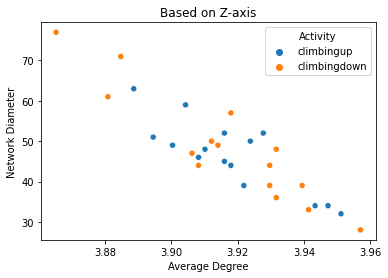

In [ ]:
ClimbingZ=Climbing[Climbing['Accelerometer Axis']=='z']
sns.scatterplot(x=ClimbingZ['Average Degree'], y=ClimbingZ['Network Diameter'], hue=ClimbingZ['Activity']).set(title="Based on Z-axis")

### Natural Visibility Graph

In [ ]:
Climbing=ClimbingUp.append(ClimbingDown)
Climbing

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Body Part
18,HVG,1,x,3.951172,33.0,13.551780,climbingup,head
19,HVG,1,y,3.921875,48.0,21.289009,climbingup,head
20,HVG,1,z,3.921875,39.0,16.455628,climbingup,head
21,NVG,1,x,9.167969,12.0,5.033866,climbingup,head
22,NVG,1,y,18.816406,9.0,4.386371,climbingup,head
...,...,...,...,...,...,...,...,...
343,HVG,1,y,3.949219,25.0,10.861815,climbingdown,head
344,HVG,1,z,3.931641,48.0,18.122953,climbingdown,head
345,NVG,1,x,10.019531,13.0,5.308571,climbingdown,head
346,NVG,1,y,13.814453,10.0,4.723846,climbingdown,head


In [ ]:
Climbing=Climbing[Climbing['Method']=='NVG']

[Text(0.5, 1.0, 'Based on all axis')]

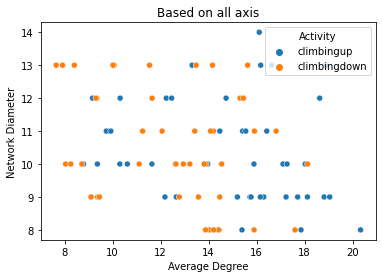

In [ ]:
sns.scatterplot(x=Climbing['Average Degree'], y=Climbing['Network Diameter'], hue=Climbing['Activity']).set(title='Based on all axis')

[Text(0.5, 1.0, 'Based on X-axis')]

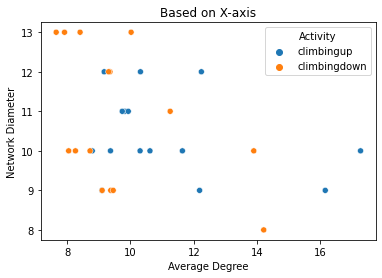

In [ ]:
ClimbingX=Climbing[Climbing['Accelerometer Axis']=='x']
sns.scatterplot(x=ClimbingX['Average Degree'], y=ClimbingX['Network Diameter'], hue=ClimbingX['Activity']).set(title="Based on X-axis")

[Text(0.5, 1.0, 'Based on Y-axis')]

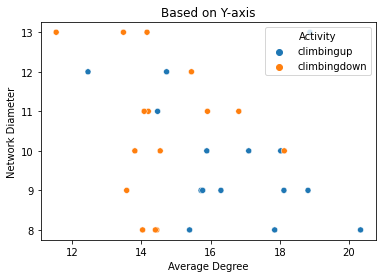

In [ ]:
ClimbingY=Climbing[Climbing['Accelerometer Axis']=='y']
sns.scatterplot(x=ClimbingY['Average Degree'], y=ClimbingY['Network Diameter'], hue=ClimbingY['Activity']).set(title="Based on Y-axis")

[Text(0.5, 1.0, 'Based on Z-axis')]

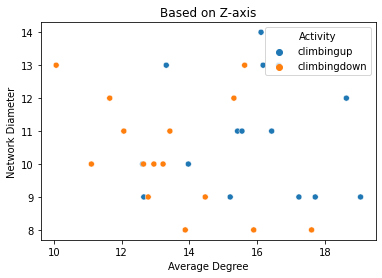

In [ ]:
ClimbingZ=Climbing[Climbing['Accelerometer Axis']=='z']
sns.scatterplot(x=ClimbingZ['Average Degree'], y=ClimbingZ['Network Diameter'], hue=ClimbingZ['Activity']).set(title="Based on Z-axis")

### Scatter Plot for Running and Walking

### Horizontal Visibility Graph

In [ ]:
RunWalk=Running.append(Walking)
RunWalk

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Body Part
372,HVG,1,x,3.964844,18.0,7.633704,running,head
373,HVG,1,y,3.953125,22.0,8.268401,running,head
374,HVG,1,z,3.964844,21.0,10.148143,running,head
375,NVG,1,x,6.464844,9.0,4.907564,running,head
376,NVG,1,y,8.330078,11.0,5.192731,running,head
...,...,...,...,...,...,...,...,...
715,HVG,1,y,3.966797,24.0,10.074499,walking,head
716,HVG,1,z,3.914062,39.0,14.945923,walking,head
717,NVG,1,x,12.492188,11.0,4.518703,walking,head
718,NVG,1,y,13.187500,9.0,4.281492,walking,head


In [ ]:
RunWalk=RunWalk[RunWalk['Method']=='HVG']

[Text(0.5, 1.0, 'Based on all axis')]

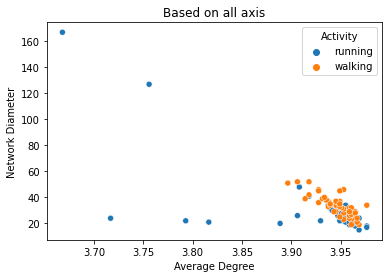

In [ ]:
sns.scatterplot(x=RunWalk['Average Degree'], y=RunWalk['Network Diameter'], hue=RunWalk['Activity']).set(title='Based on all axis')

[Text(0.5, 1.0, 'Based on X-axis')]

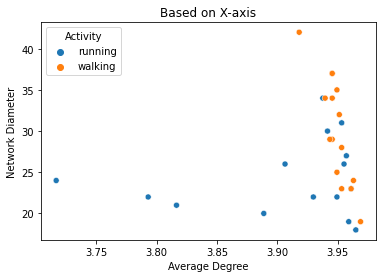

In [ ]:
RunWalkX=RunWalk[RunWalk['Accelerometer Axis']=='x']
sns.scatterplot(x=RunWalkX['Average Degree'], y=RunWalkX['Network Diameter'], hue=RunWalkX['Activity']).set(title="Based on X-axis")

[Text(0.5, 1.0, 'Based on Y-axis')]

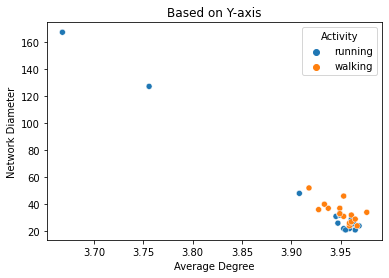

In [ ]:
RunWalkX=RunWalk[RunWalk['Accelerometer Axis']=='y']
sns.scatterplot(x=RunWalkX['Average Degree'], y=RunWalkX['Network Diameter'], hue=RunWalkX['Activity']).set(title="Based on Y-axis")

[Text(0.5, 1.0, 'Based on Z-axis')]

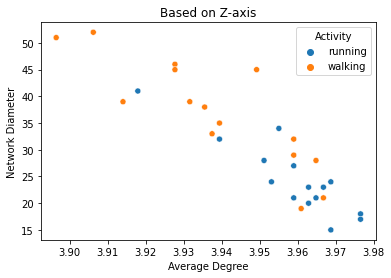

In [ ]:
RunWalkX=RunWalk[RunWalk['Accelerometer Axis']=='z']
sns.scatterplot(x=RunWalkX['Average Degree'], y=RunWalkX['Network Diameter'], hue=RunWalkX['Activity']).set(title="Based on Z-axis")

### Natural Visibility Graph

In [ ]:
RunWalk=Running.append(Walking)
RunWalk

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Body Part
372,HVG,1,x,3.964844,18.0,7.633704,running,head
373,HVG,1,y,3.953125,22.0,8.268401,running,head
374,HVG,1,z,3.964844,21.0,10.148143,running,head
375,NVG,1,x,6.464844,9.0,4.907564,running,head
376,NVG,1,y,8.330078,11.0,5.192731,running,head
...,...,...,...,...,...,...,...,...
715,HVG,1,y,3.966797,24.0,10.074499,walking,head
716,HVG,1,z,3.914062,39.0,14.945923,walking,head
717,NVG,1,x,12.492188,11.0,4.518703,walking,head
718,NVG,1,y,13.187500,9.0,4.281492,walking,head


In [ ]:
RunWalk=RunWalk[RunWalk['Method']=='NVG']

[Text(0.5, 1.0, 'Based on all axis')]

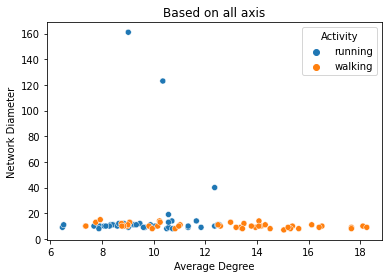

In [ ]:
sns.scatterplot(x=RunWalk['Average Degree'], y=RunWalk['Network Diameter'], hue=RunWalk['Activity']).set(title='Based on all axis')

[Text(0.5, 1.0, 'Based on X-axis')]

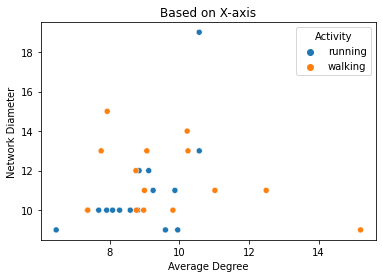

In [ ]:
RunWalkX=RunWalk[RunWalk['Accelerometer Axis']=='x']
sns.scatterplot(x=RunWalkX['Average Degree'], y=RunWalkX['Network Diameter'], hue=RunWalkX['Activity']).set(title="Based on X-axis")

[Text(0.5, 1.0, 'Based on Y-axis')]

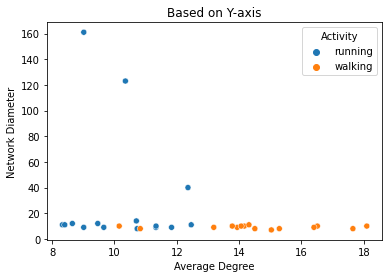

In [ ]:
RunWalkX=RunWalk[RunWalk['Accelerometer Axis']=='y']
sns.scatterplot(x=RunWalkX['Average Degree'], y=RunWalkX['Network Diameter'], hue=RunWalkX['Activity']).set(title="Based on Y-axis")

[Text(0.5, 1.0, 'Based on Z-axis')]

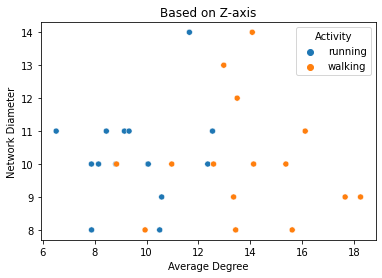

In [ ]:
RunWalkX=RunWalk[RunWalk['Accelerometer Axis']=='z']
sns.scatterplot(x=RunWalkX['Average Degree'], y=RunWalkX['Network Diameter'], hue=RunWalkX['Activity']).set(title="Based on Z-axis")

## Based on Chest Body part

In [ ]:
ClimbingUp=ResultChest[ResultChest['Activity']=='climbingup']
ClimbingDown=ResultChest[ResultChest['Activity']=='climbingdown']
Running=ResultChest[ResultChest['Activity']=='running']
Walking=ResultChest[ResultChest['Activity']=='walking']

### Scatter plot Climbing Up and Climbing Down


### Horizontal Visibility Graph

In [ ]:
Climbing=ClimbingUp.append(ClimbingDown)
Climbing

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Body Part
12,HVG,1,x,3.953125,26.0,11.659058,climbingup,chest
13,HVG,1,y,3.947266,32.0,13.796356,climbingup,chest
14,HVG,1,z,3.968750,26.0,11.595193,climbingup,chest
15,NVG,1,x,12.820312,10.0,4.504794,climbingup,chest
16,NVG,1,y,13.744141,11.0,5.264697,climbingup,chest
...,...,...,...,...,...,...,...,...
337,HVG,1,y,3.947266,28.0,12.518642,climbingdown,chest
338,HVG,1,z,3.968750,23.0,9.949156,climbingdown,chest
339,NVG,1,x,15.609375,16.0,6.598815,climbingdown,chest
340,NVG,1,y,14.087891,10.0,4.261784,climbingdown,chest


In [ ]:
Climbing=Climbing[Climbing['Method']=='HVG']

[Text(0.5, 1.0, 'Based on all axis')]

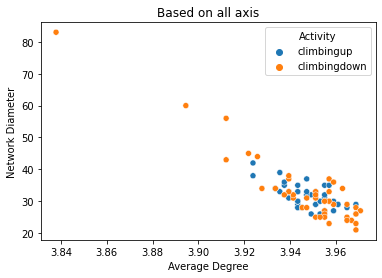

In [ ]:
sns.scatterplot(x=Climbing['Average Degree'], y=Climbing['Network Diameter'], hue=Climbing['Activity']).set(title='Based on all axis')

[Text(0.5, 1.0, 'Based on X-axis')]

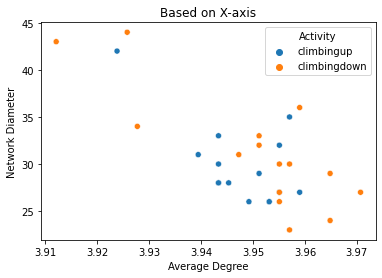

In [ ]:
ClimbingX=Climbing[Climbing['Accelerometer Axis']=='x']
sns.scatterplot(x=ClimbingX['Average Degree'], y=ClimbingX['Network Diameter'], hue=ClimbingX['Activity']).set(title="Based on X-axis")

[Text(0.5, 1.0, 'Based on Y-axis')]

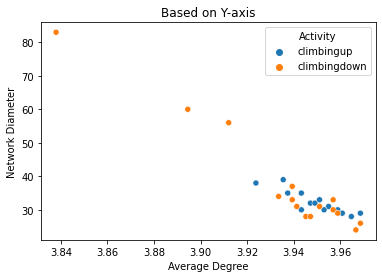

In [ ]:
ClimbingY=Climbing[Climbing['Accelerometer Axis']=='y']
sns.scatterplot(x=ClimbingY['Average Degree'], y=ClimbingY['Network Diameter'], hue=ClimbingY['Activity']).set(title="Based on Y-axis")

[Text(0.5, 1.0, 'Based on Z-axis')]

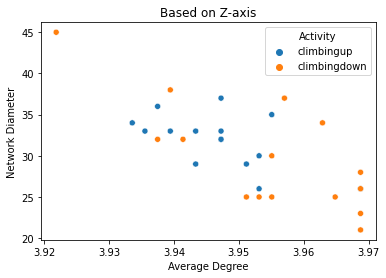

In [ ]:
ClimbingZ=Climbing[Climbing['Accelerometer Axis']=='z']
sns.scatterplot(x=ClimbingZ['Average Degree'], y=ClimbingZ['Network Diameter'], hue=ClimbingZ['Activity']).set(title="Based on Z-axis")

### Natural Visibility Graph

In [ ]:
Climbing=ClimbingUp.append(ClimbingDown)
Climbing

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Body Part
12,HVG,1,x,3.953125,26.0,11.659058,climbingup,chest
13,HVG,1,y,3.947266,32.0,13.796356,climbingup,chest
14,HVG,1,z,3.968750,26.0,11.595193,climbingup,chest
15,NVG,1,x,12.820312,10.0,4.504794,climbingup,chest
16,NVG,1,y,13.744141,11.0,5.264697,climbingup,chest
...,...,...,...,...,...,...,...,...
337,HVG,1,y,3.947266,28.0,12.518642,climbingdown,chest
338,HVG,1,z,3.968750,23.0,9.949156,climbingdown,chest
339,NVG,1,x,15.609375,16.0,6.598815,climbingdown,chest
340,NVG,1,y,14.087891,10.0,4.261784,climbingdown,chest


In [ ]:
Climbing=Climbing[Climbing['Method']=='NVG']

[Text(0.5, 1.0, 'Based on all axis')]

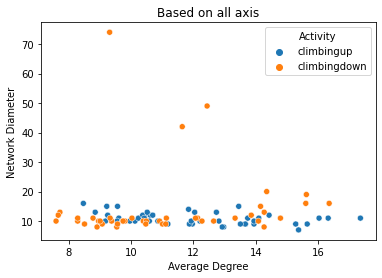

In [ ]:
sns.scatterplot(x=Climbing['Average Degree'], y=Climbing['Network Diameter'], hue=Climbing['Activity']).set(title='Based on all axis')

[Text(0.5, 1.0, 'Based on X-axis')]

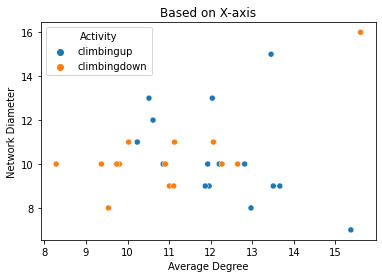

In [ ]:
ClimbingX=Climbing[Climbing['Accelerometer Axis']=='x']
sns.scatterplot(x=ClimbingX['Average Degree'], y=ClimbingX['Network Diameter'], hue=ClimbingX['Activity']).set(title="Based on X-axis")

[Text(0.5, 1.0, 'Based on Y-axis')]

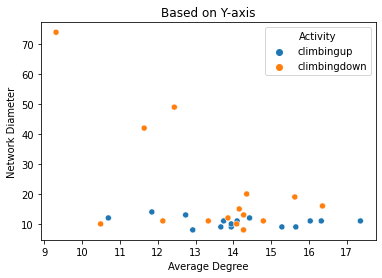

In [ ]:
ClimbingY=Climbing[Climbing['Accelerometer Axis']=='y']
sns.scatterplot(x=ClimbingY['Average Degree'], y=ClimbingY['Network Diameter'], hue=ClimbingY['Activity']).set(title="Based on Y-axis")

[Text(0.5, 1.0, 'Based on Z-axis')]

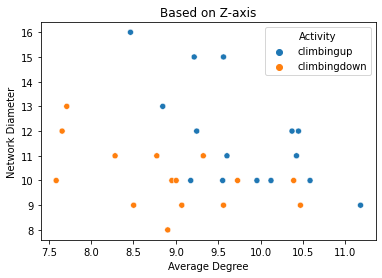

In [ ]:
ClimbingZ=Climbing[Climbing['Accelerometer Axis']=='z']
sns.scatterplot(x=ClimbingZ['Average Degree'], y=ClimbingZ['Network Diameter'], hue=ClimbingZ['Activity']).set(title="Based on Z-axis")

### Scatter Plot for Running and Walking

### Horizontal Visibility Graph

In [ ]:
RunWalk=Running.append(Walking)
RunWalk

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Body Part
366,HVG,1,x,3.964844,20.0,8.672547,running,chest
367,HVG,1,y,3.662109,170.0,59.485246,running,chest
368,HVG,1,z,3.974609,20.0,9.290619,running,chest
369,NVG,1,x,8.277344,9.0,4.772231,running,chest
370,NVG,1,y,9.763672,168.0,57.067139,running,chest
...,...,...,...,...,...,...,...,...
709,HVG,1,y,3.951172,22.0,10.666252,walking,chest
710,HVG,1,z,3.957031,23.0,10.602296,walking,chest
711,NVG,1,x,11.451172,10.0,4.441492,walking,chest
712,NVG,1,y,11.986328,9.0,4.241050,walking,chest


In [ ]:
RunWalk=RunWalk[RunWalk['Method']=='HVG']

[Text(0.5, 1.0, 'Based on all axis')]

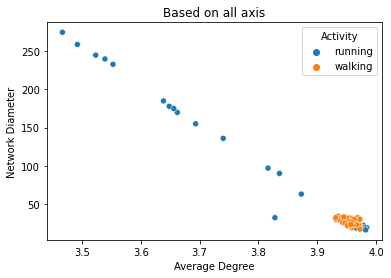

In [ ]:
sns.scatterplot(x=RunWalk['Average Degree'], y=RunWalk['Network Diameter'], hue=RunWalk['Activity']).set(title='Based on all axis')

[Text(0.5, 1.0, 'Based on X-axis')]

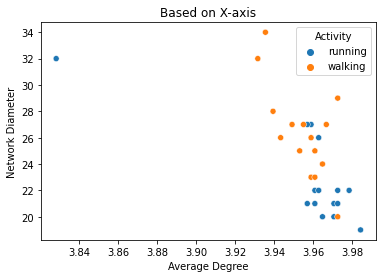

In [ ]:
RunWalkX=RunWalk[RunWalk['Accelerometer Axis']=='x']
sns.scatterplot(x=RunWalkX['Average Degree'], y=RunWalkX['Network Diameter'], hue=RunWalkX['Activity']).set(title="Based on X-axis")

[Text(0.5, 1.0, 'Based on Y-axis')]

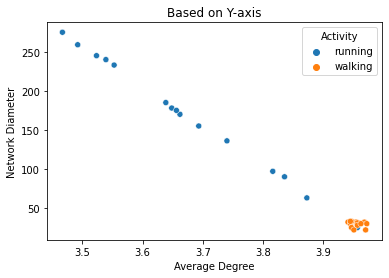

In [ ]:
RunWalkX=RunWalk[RunWalk['Accelerometer Axis']=='y']
sns.scatterplot(x=RunWalkX['Average Degree'], y=RunWalkX['Network Diameter'], hue=RunWalkX['Activity']).set(title="Based on Y-axis")

[Text(0.5, 1.0, 'Based on Z-axis')]

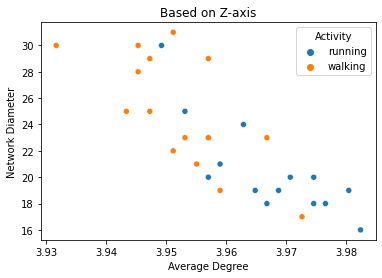

In [ ]:
RunWalkX=RunWalk[RunWalk['Accelerometer Axis']=='z']
sns.scatterplot(x=RunWalkX['Average Degree'], y=RunWalkX['Network Diameter'], hue=RunWalkX['Activity']).set(title="Based on Z-axis")

### Natural Visibility Graph

In [ ]:
RunWalk=Running.append(Walking)
RunWalk

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Body Part
366,HVG,1,x,3.964844,20.0,8.672547,running,chest
367,HVG,1,y,3.662109,170.0,59.485246,running,chest
368,HVG,1,z,3.974609,20.0,9.290619,running,chest
369,NVG,1,x,8.277344,9.0,4.772231,running,chest
370,NVG,1,y,9.763672,168.0,57.067139,running,chest
...,...,...,...,...,...,...,...,...
709,HVG,1,y,3.951172,22.0,10.666252,walking,chest
710,HVG,1,z,3.957031,23.0,10.602296,walking,chest
711,NVG,1,x,11.451172,10.0,4.441492,walking,chest
712,NVG,1,y,11.986328,9.0,4.241050,walking,chest


In [ ]:
RunWalk=RunWalk[RunWalk['Method']=='NVG']

[Text(0.5, 1.0, 'Based on all axis')]

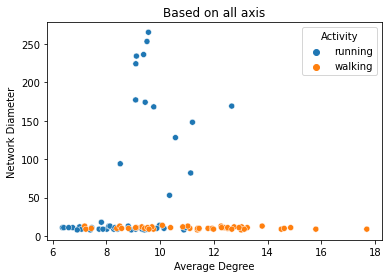

In [ ]:
sns.scatterplot(x=RunWalk['Average Degree'], y=RunWalk['Network Diameter'], hue=RunWalk['Activity']).set(title='Based on all axis')

[Text(0.5, 1.0, 'Based on X-axis')]

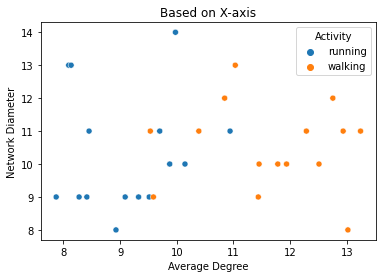

In [ ]:
RunWalkX=RunWalk[RunWalk['Accelerometer Axis']=='x']
sns.scatterplot(x=RunWalkX['Average Degree'], y=RunWalkX['Network Diameter'], hue=RunWalkX['Activity']).set(title="Based on X-axis")

[Text(0.5, 1.0, 'Based on Y-axis')]

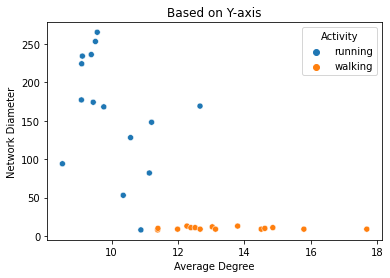

In [ ]:
RunWalkX=RunWalk[RunWalk['Accelerometer Axis']=='y']
sns.scatterplot(x=RunWalkX['Average Degree'], y=RunWalkX['Network Diameter'], hue=RunWalkX['Activity']).set(title="Based on Y-axis")

[Text(0.5, 1.0, 'Based on Z-axis')]

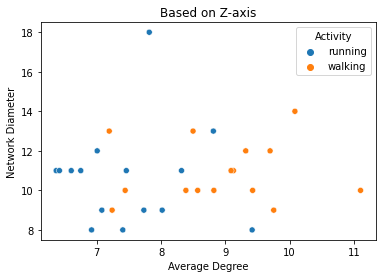

In [ ]:
RunWalkX=RunWalk[RunWalk['Accelerometer Axis']=='z']
sns.scatterplot(x=RunWalkX['Average Degree'], y=RunWalkX['Network Diameter'], hue=RunWalkX['Activity']).set(title="Based on Z-axis")

# Task 2

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

# Combining all datasets together

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
total=pd.read_csv('/content/drive/MyDrive/final_data (1).csv')
total

,Unnamed: 0,id,attr_time,attr_x,attr_y,attr_z,body,subject,activity
0,0,1,1435996968010,5.616797,8.064270,0.878073,chest,1,climbingdown
1,1,2,1435996968032,5.589264,8.054693,0.869095,chest,1,climbingdown
2,2,3,1435996968052,5.580884,8.060080,0.908001,chest,1,climbingdown
3,3,4,1435996968073,5.588067,8.033744,0.884657,chest,1,climbingdown
4,4,5,1435996968093,5.583877,8.060678,0.875679,chest,1,climbingdown
...,...,...,...,...,...,...,...,...,...
3491088,3491088,33213,1437229289901,-8.680179,4.254497,0.274735,head,15,walking
3491089,3491089,33214,1437229289924,-8.703522,4.221576,0.280720,head,15,walking
3491090,3491090,33215,1437229289942,-8.750807,4.193444,0.299874,head,15,walking
3491091,3491091,33216,1437229289964,-8.771756,4.150947,0.290297,head,15,walking


#Permulation Entropy & Complexity functions

In [ ]:
#calculation Function
def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)



def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)


def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

#Computation function

In [ ]:

output=[]
output=pd.DataFrame(output)
 
Temp_out=[1]
Temp_out=pd.DataFrame(Temp_out)

Activity=['walking','running','climbingdown','climbingup']
BODY=['head','chest']
#Iterating each variable(axis/Signal_length/Dimension/Delay) to calculate the Permutation_entropy & complexity
for subject in range(1,16):
  data1=total.loc[total['subject'] == subject]
  for act in Activity:
    data2=data1.loc[data1['activity'] == act]
    for bo in BODY:
      data3=data2.loc[data2['body'] == bo]  
      for i in ['attr_x','attr_y','attr_z']:
        for k in [1024,2048,4096]:
          for m in range(3,7):
            for n in range(1,4):
              temp=data3[i][0:k]
              op=ordinal_patterns(temp, m, n)
              pe=p_entropy(op)
              comp=complexity(op)

              # PE.append(pe)
              # COMP.append(comp)
              Temp_out['subject']=subject
              Temp_out['Accelerometer_axis']=i
              Temp_out['Signal length']=k
              Temp_out['Dimension']=m
              Temp_out['Delay']=n
              Temp_out['Permutation_entropy']=pe
              Temp_out['complexity']=comp
              Temp_out['activity']=act
              Temp_out['body']=bo
              output=pd.concat([output,Temp_out],ignore_index=True)
              Temp_out=[1]
              Temp_out=pd.DataFrame(Temp_out)


output=pd.DataFrame(output)
output = output.drop(0, axis=1)
output



,subject,Accelerometer_axis,Signal length,Dimension,Delay,Permutation_entropy,complexity,activity,body
0,1,attr_x,1024,3,1,0.775745,0.171051,walking,head
1,1,attr_x,1024,3,2,0.879580,0.101684,walking,head
2,1,attr_x,1024,3,3,0.943963,0.050110,walking,head
3,1,attr_x,1024,4,1,0.692641,0.239437,walking,head
4,1,attr_x,1024,4,2,0.827176,0.178617,walking,head
...,...,...,...,...,...,...,...,...,...
12955,15,attr_z,4096,5,2,0.846286,0.212606,climbingup,chest
12956,15,attr_z,4096,5,3,0.898380,0.157767,climbingup,chest
12957,15,attr_z,4096,6,1,0.735559,0.298970,climbingup,chest
12958,15,attr_z,4096,6,2,0.860888,0.234918,climbingup,chest


# Dividing output into two parts

In [ ]:
HEAD=output.loc[output['body'] == 'head']
HEAD

,subject,Accelerometer_axis,Signal length,Dimension,Delay,Permutation_entropy,complexity,activity,body
0,1,attr_x,1024,3,1,0.775745,0.171051,walking,head
1,1,attr_x,1024,3,2,0.879580,0.101684,walking,head
2,1,attr_x,1024,3,3,0.943963,0.050110,walking,head
3,1,attr_x,1024,4,1,0.692641,0.239437,walking,head
4,1,attr_x,1024,4,2,0.827176,0.178617,walking,head
...,...,...,...,...,...,...,...,...,...
12847,15,attr_z,4096,5,2,0.819468,0.228447,climbingup,head
12848,15,attr_z,4096,5,3,0.871741,0.187515,climbingup,head
12849,15,attr_z,4096,6,1,0.756573,0.278537,climbingup,head
12850,15,attr_z,4096,6,2,0.838279,0.245443,climbingup,head


In [ ]:
CHEST=output.loc[output['body'] == 'chest']
CHEST

,subject,Accelerometer_axis,Signal length,Dimension,Delay,Permutation_entropy,complexity,activity,body
108,1,attr_x,1024,3,1,0.855987,0.119191,walking,chest
109,1,attr_x,1024,3,2,0.960568,0.036283,walking,chest
110,1,attr_x,1024,3,3,0.982132,0.016977,walking,chest
111,1,attr_x,1024,4,1,0.794190,0.199622,walking,chest
112,1,attr_x,1024,4,2,0.926945,0.085968,walking,chest
...,...,...,...,...,...,...,...,...,...
12955,15,attr_z,4096,5,2,0.846286,0.212606,climbingup,chest
12956,15,attr_z,4096,5,3,0.898380,0.157767,climbingup,chest
12957,15,attr_z,4096,6,1,0.735559,0.298970,climbingup,chest
12958,15,attr_z,4096,6,2,0.860888,0.234918,climbingup,chest


In [ ]:
ClimbingUp=HEAD[HEAD['activity']=='climbingup']
ClimbingDown=HEAD[HEAD['activity']=='climbingdown']
Running=HEAD[HEAD['activity']=='running']
Walking=HEAD[HEAD['activity']=='walking']

In [ ]:
ClimbingUp=ClimbingUp[(ClimbingUp['Signal length']== 4096) & (ClimbingUp['Delay'] == 1)]
ClimbingDown=ClimbingDown[(ClimbingDown['Signal length']==4096) & (ClimbingDown['Delay'] == 1)]
Running=Running[(Running['Signal length']==4096) & (Running['Delay'] == 1) ]
Walking=Walking[(Walking['Signal length']==4096) & (Walking['Delay'] == 1)]

In [ ]:
Climbing=ClimbingUp.append(ClimbingDown)
Climbing

,subject,Accelerometer_axis,Signal length,Dimension,Delay,Permutation_entropy,complexity,activity,body
672,1,attr_x,4096,3,1,0.817299,0.142736,climbingup,head
675,1,attr_x,4096,4,1,0.749098,0.213091,climbingup,head
678,1,attr_x,4096,5,1,0.717517,0.273550,climbingup,head
681,1,attr_x,4096,6,1,0.741141,0.284713,climbingup,head
708,1,attr_y,4096,3,1,0.808378,0.150094,climbingup,head
...,...,...,...,...,...,...,...,...,...
12597,15,attr_y,4096,6,1,0.817870,0.238182,climbingdown,head
12624,15,attr_z,4096,3,1,0.939653,0.054313,climbingdown,head
12627,15,attr_z,4096,4,1,0.908050,0.097308,climbingdown,head
12630,15,attr_z,4096,5,1,0.883216,0.151440,climbingdown,head


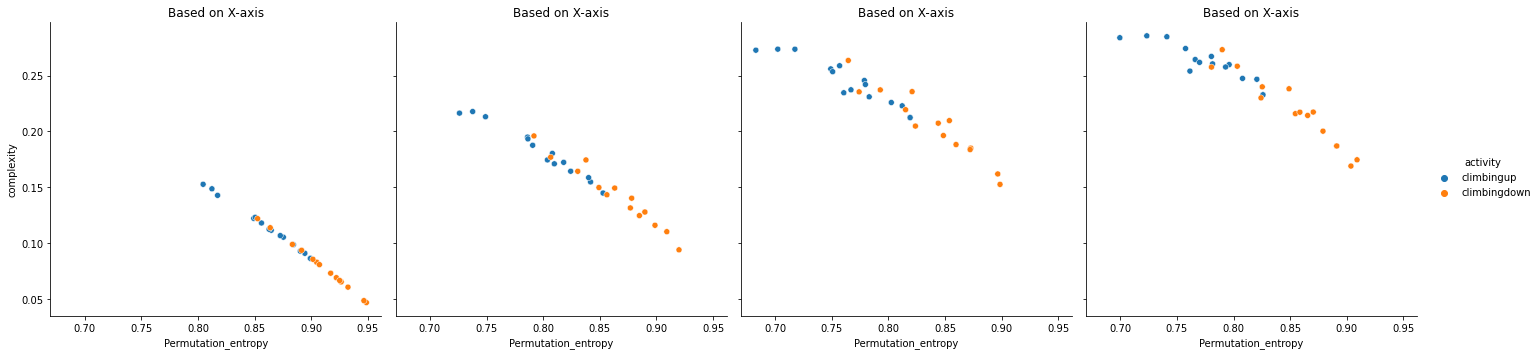

In [ ]:
ClimbingX=Climbing[Climbing['Accelerometer_axis']=='attr_x']
sns.relplot(x=ClimbingX['Permutation_entropy'], y=ClimbingX['complexity'],col = ClimbingX['Dimension'],hue=ClimbingX['activity']).set(title="Based on X-axis")

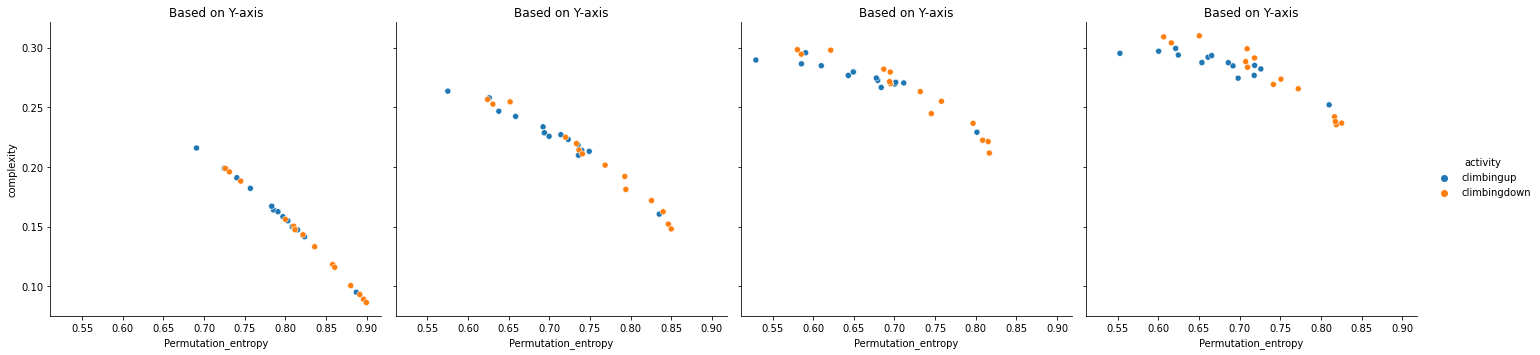

In [ ]:
Climbingy=Climbing[Climbing['Accelerometer_axis']=='attr_y']
sns.relplot(x=Climbingy['Permutation_entropy'], y=Climbingy['complexity'],col = Climbingy['Dimension'],hue=Climbingy['activity']).set(title="Based on Y-axis")

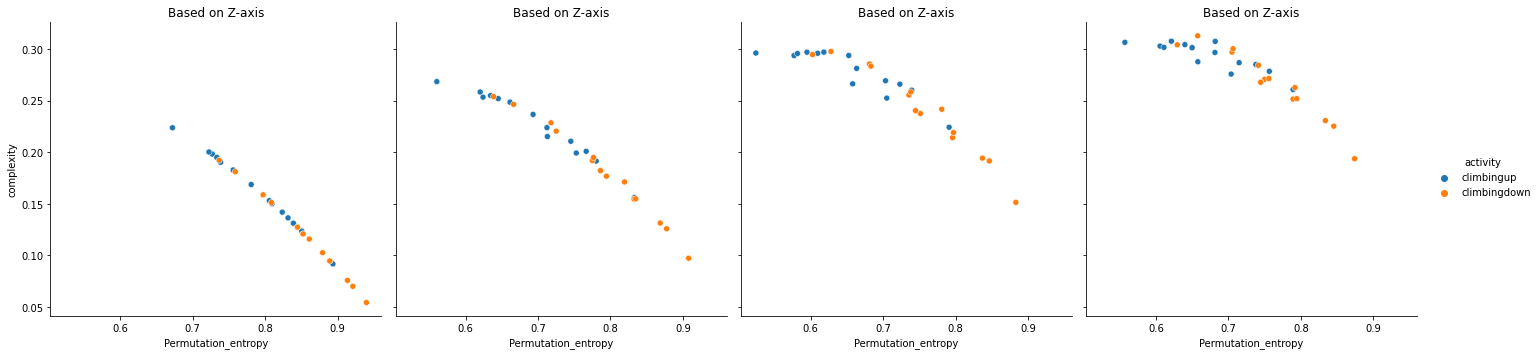

In [ ]:
Climbingz=Climbing[Climbing['Accelerometer_axis']=='attr_z']
sns.relplot(x=Climbingz['Permutation_entropy'], y=Climbingz['complexity'],col = Climbingz['Dimension'],hue=Climbingz['activity']).set(title="Based on Z-axis")

In [ ]:
ClimbingUp=CHEST[CHEST['activity']=='climbingup']
ClimbingDown=CHEST[CHEST['activity']=='climbingdown']
Running=CHEST[CHEST['activity']=='running']
Walking=CHEST[CHEST['activity']=='walking']

In [ ]:
ClimbingUp=ClimbingUp[(ClimbingUp['Signal length']== 4096) & (ClimbingUp['Delay'] == 1)]
ClimbingDown=ClimbingDown[(ClimbingDown['Signal length']==4096) & (ClimbingDown['Delay'] == 1)]
Running=Running[(Running['Signal length']==4096) & (Running['Delay'] == 1) ]
Walking=Walking[(Walking['Signal length']==4096) & (Walking['Delay'] == 1)]

In [ ]:
Climbing=ClimbingUp.append(ClimbingDown)
Climbing

,subject,Accelerometer_axis,Signal length,Dimension,Delay,Permutation_entropy,complexity,activity,body
780,1,attr_x,4096,3,1,0.838023,0.132104,climbingup,chest
783,1,attr_x,4096,4,1,0.771260,0.205237,climbingup,chest
786,1,attr_x,4096,5,1,0.736046,0.271595,climbingup,chest
789,1,attr_x,4096,6,1,0.761819,0.281545,climbingup,chest
816,1,attr_y,4096,3,1,0.763331,0.176965,climbingup,chest
...,...,...,...,...,...,...,...,...,...
12705,15,attr_y,4096,6,1,0.764164,0.294014,climbingdown,chest
12732,15,attr_z,4096,3,1,0.901551,0.085465,climbingdown,chest
12735,15,attr_z,4096,4,1,0.858107,0.150736,climbingdown,chest
12738,15,attr_z,4096,5,1,0.831513,0.218669,climbingdown,chest


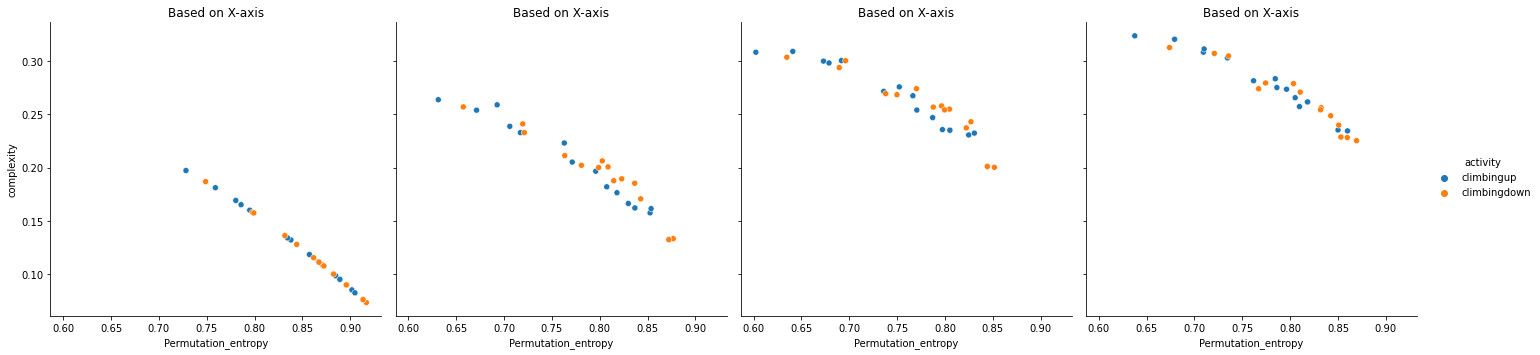

In [ ]:
ClimbingX=Climbing[Climbing['Accelerometer_axis']=='attr_x']
sns.relplot(x=ClimbingX['Permutation_entropy'], y=ClimbingX['complexity'],col = ClimbingX['Dimension'],hue=ClimbingX['activity']).set(title="Based on X-axis")

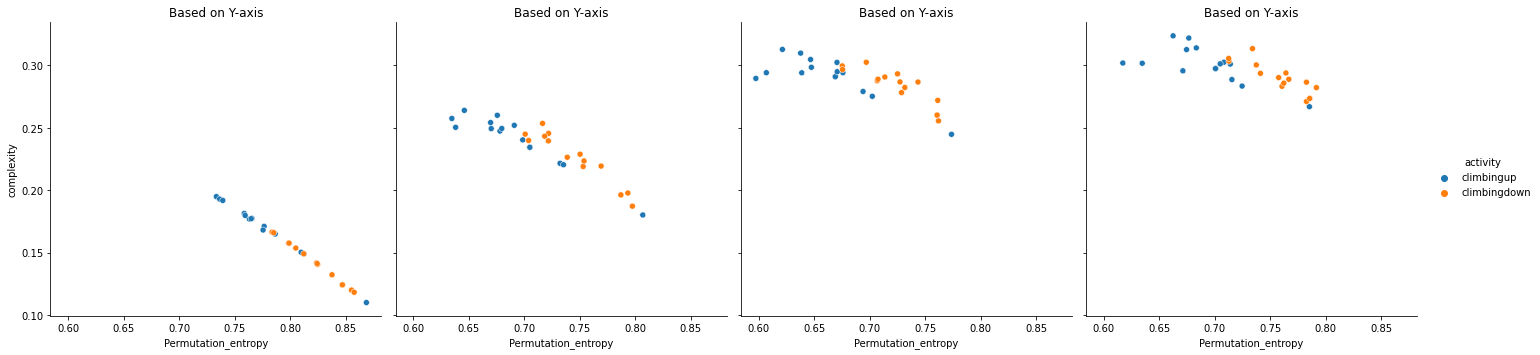

In [ ]:
Climbingy=Climbing[Climbing['Accelerometer_axis']=='attr_y']
sns.relplot(x=Climbingy['Permutation_entropy'], y=Climbingy['complexity'],col = Climbingy['Dimension'],hue=Climbingy['activity']).set(title="Based on Y-axis")

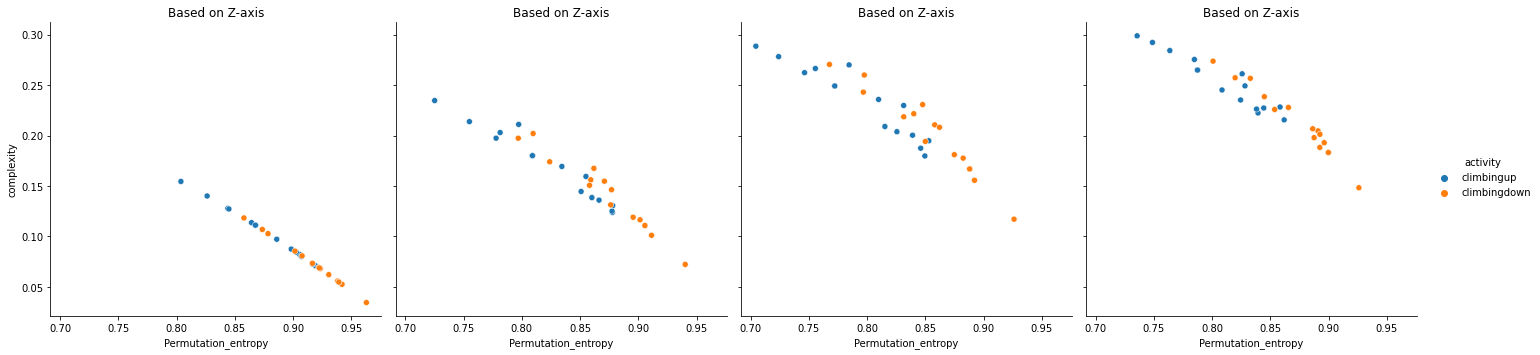

In [ ]:
Climbingz=Climbing[Climbing['Accelerometer_axis']=='attr_z']
sns.relplot(x=Climbingz['Permutation_entropy'], y=Climbingz['complexity'],col = Climbingz['Dimension'],hue=Climbingz['activity']).set(title="Based on Z-axis")